# Data Trained Data Science Program

# project Discussion 

# HeadBrain use case :-

we are going to perform regression on HeadBrain datset. The input data is in .csv format with 237 observations. it has total four columns (discription is given below).

1. Gender : 1 for male 2 for female
2. Age range : 1 for age 20-40, 2 for over 46
3. Head size : head size in cubic cm
4. Brain Weight : brain weight in grams
    
our target variable is "Brain Weight " which has continuous data so it's a regression problem.

### Importing required libraries

In [1]:
# Importing warning library to avoid any warning message
import warnings
warnings.simplefilter("ignore")

### Loading the data set

In [1]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df.head() #printing first 5 rows of dataset

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
df.shape #Checking data dimension

(237, 4)

dataset has 237 rows and 4 columns

### Data preparation 

In [3]:
# Renaming the columns names to bit easier terms
df=df.rename(columns={'HeadSize':'Size','BrainWeight':'Weight'})
df.head()

,Gender,AgeRange,Size,Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.describe() #Statical summary

,Gender,AgeRange,Size,Weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


1. Here we can see there are no missing value.
2. No much difference observed betweeen mean and median so outliers are not there  still we will validate this further.

In [6]:
df.info()# checking the datatype of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Gender    237 non-null    int64
 1   AgeRange  237 non-null    int64
 2   Size      237 non-null    int64
 3   Weight    237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


There is no categorical columns exists in this dataset so encoding is not needed.

In [7]:
df.isnull().sum() #checking if null is present in the dataset

Gender      0
AgeRange    0
Size        0
Weight      0
dtype: int64

No null value present in dataset 

# Exploratory data analysis (EDA)-

### Univariate analysis :-
__In univariate analysis we will do analysis based on one single column.we will use one column and we will do graphical representation of the data which is present that column.__

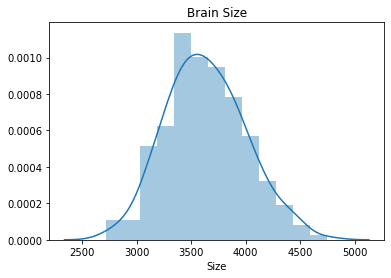

In [8]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

sn.distplot(df["Size"])
plt.title("Brain Size")
plt.show()

It is showing that data is normally distributed in column.F

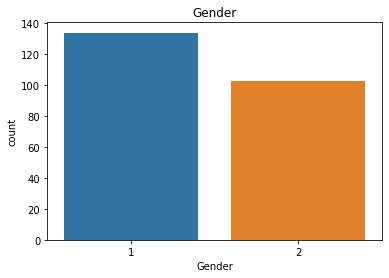

In [9]:
# Plotting the "Gender" column
sn.countplot(df["Gender"])
plt.title("Gender")
plt.show()

Data distribution of "Gender" column is showing normal between both categories.

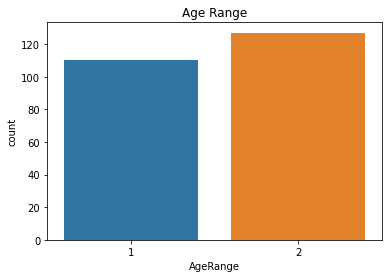

In [10]:
# plotting the "Age Range" column
sn.countplot(df["AgeRange"])
plt.title("Age Range")
plt.show()

Data distribution of "Age Range" column is showing normal between both the categories.

### Bibariate analysis:-
__In the Bivariate analysis we make sure that we use two coulmns for our analysis.__  

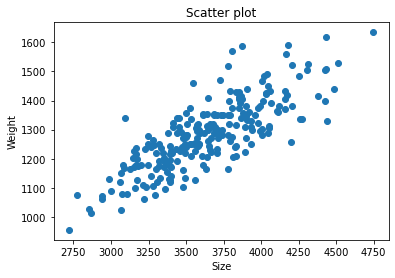

In [11]:
# Plotting scatter plot to check relationship between "size" and "Weight"

plt.scatter (df["Size"],df["Weight"])
plt.title("Scatter plot")
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

We can see a clear linear relationship(positive) between "Size" and "Weight" in above scatter plot.

### Multivriable analysis :-
__In the Multivariable we can use multiple columns for our anylysis and graphical representation.__

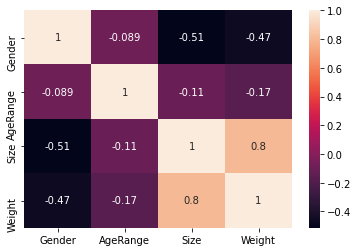

In [12]:
#Checking correlation using heatmap
corr=df.corr() #df.corr function provides the correlation value of each column
sn.heatmap(corr,annot=True) # Using heatmap we plotting  correlation values obtained by df.corr function. and  annot=True--> it will represent value on blocks in graph otherwise graph will be blank.
plt.show()

1. Very low correlation of "Age Range" with target variable so we can drop this column.
2. Very high and positive correlation of "Size" with target variable.
3. High negative correlation of "Gender" coloumn with target variable but we will keep it as relation is strong.

In [13]:
df.drop("AgeRange",axis=1,inplace=True) #Droping "Gender" column from dataset

# Handling Outliers :-

Outliers can impact the mean significantly , so it's always better to check the dataset for outliers and treat them if needed.

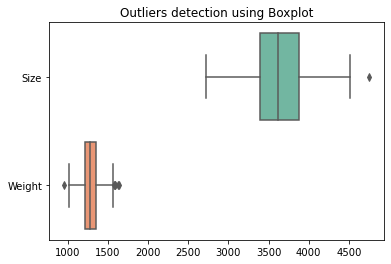

In [14]:
#Cheaking outliers using boxplot
sn.boxplot(data=df[["Size","Weight"]],orient="h",palette="Set2")
plt.title("Outliers detection using Boxplot")
plt.show()

#orient function is use for horizontal boxplot.
#palette function is used for represent boxplot with different color. 

There are outliers which can be removed using different method, in this project we will use Inter Quartile Range to remove the outliers.

In [15]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
new_df=df[(z < 3).all(axis=1)]

In [16]:
print("Origininal shape= ",df.shape, "\nNew shape= ",new_df.shape)

Origininal shape=  (237, 3) 
New shape=  (236, 3)


__Skewness is also an important factor which impacts distribution of the data. Always try to make the dataset less skewed.__

In [17]:
#cheaking the skewness (if exists)
new_df.skew()

Gender    0.257959
Size      0.164767
Weight    0.205274
dtype: float64

#### skewness is in acceptable range (+/- 0.5) so we our data is not skewed.

# Preparing dataset for model training-

In [18]:
# seperating  independent and target variable
x=new_df.drop("Weight",axis=1)
y=new_df["Weight"] #target variable

# Scaling-

Mosel can be biased to higher values in dataset so it's better to  scale the dataset so that can bring all the columns in common range.There are two algorithms available for scaling, StanderdScaler and MinMax scaler. We are going to use StandardScaler here.

In [19]:
#scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [20]:
#Finding best random_state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range (30,200):
    x_train, x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random_state {best_rstate}")

Best accuracy 76.6340864524104 found on random_state 128


we found best random_state 128 and will be using it in train_test_split in next step.

In [21]:
#Creating train test split using best random_state
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(scaledX,y,test_size=.25,random_state=128)

# Finding the best model

##### LinearRegression :-

In [22]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & differene = {(r2score*100)-(cvscore*100)}")

Accuracy=76.6340864524104, Cross_val_score = 53.55202717177294 & differene = 23.08205928063746


##### RandomForestRegressor :-

In [23]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & differene = {(r2score*100)-(cvscore*100)}")

Accuracy=61.7081803249973, Cross_val_score = 37.504915409285786 & differene = 24.203264915711515


##### AdaBooosterRegressor :-

In [24]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & differene = {(r2score*100)-(cvscore*100)}")

Accuracy=74.80726736566241, Cross_val_score = 43.234655191013296 & differene = 31.572612174649116


##### SGDRegressor :-

In [25]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100}, Cross_val_score = {cvscore*100} & differene = {(r2score*100)-(cvscore*100)}")

Accuracy=76.62119945397679, Cross_val_score = 53.5656263975014 & differene = 23.05557305647539


LinearRegression and SGDRegression are bet performing model with same accuracy and cros validation score. We chosse either of them as our best mdel so i am moving ahed with SGDRegressor.

# Hyperparameter tuning -
It's a technique to find out the best parameter for our model to improve the accuracy.

In [28]:
#Creating parameter list to pass in GridSearchCV
parameters = {"max_iter": [500,700,900,1100,1300,1400,1500],
             "alpha":[0.0001,0.001,0.01,0.1,1,10,100],
             "penalty":["elasticnet","l1","l2"]}

In [35]:
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2') #Initializing GridSEarchCV
GCV.fit(x_train,y_train)
GCV.best_estimator_ # finding best estimetors
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting the value uing best estimator found by GridSEarchCV
print("Final accuracy :", r2_score(y_test,GCV_pred)*100) #final accuracy

Final accuracy : 76.45804957688038


Model accuracy is not increasing after 76.45%,It is because of less data. We need to collect more data to improve the accuracy further.

# Serialization -

In [36]:
import joblib
joblib.dump(GCV.best_estimator_,"HeadBrainProject.pkl")

['HeadBrainProject.pkl']